# Digit Number

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import numpy as np

np.random.seed(4)

## Dataset

In [29]:

mnist = fetch_openml('mnist_784')
X, y = mnist['data'].to_numpy(), mnist['target'].to_numpy().astype(int)


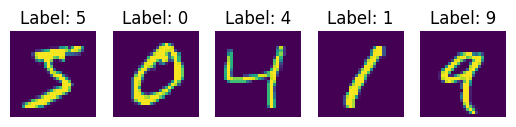

In [30]:
# show
num_imgs = 5
fig, axes = plt.subplots(1, num_imgs)
for i in range(num_imgs):
    axes[i].imshow(X[i].reshape(28,28))
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis('off')
plt.show()

## Pre-Processing

In [31]:
y_ohe = OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
def sigmoid(x):
    x = np.clip(x, -100, 100)
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return x * (1 - x)

In [35]:
def forward_prop(w1, w2, b1, b2, x):
    z1 = x @ w1 + b1
    h1 = sigmoid(z1)

    z2 = h1 @ w2 + b2
    y_hat = sigmoid(z2)

    return z1, h1, z2, y_hat

def back_prop(m,w1,w2,z1,h1,z2,y_hat,x,y):
    dz2 = y_hat - y
    dw2 = h1.T @ dz2
    db2 = np.ones((1,m)) @ dz2 / m

    dz1 = (dz2 @ w2.T) * sigmoid_prime(h1)
    dw1 = x.T @ dz1
    db1 = np.ones((1,m)) @ dz1 / m

    return dw1, db1, dw2, db2

## Initialization

In [36]:
## Initialize weights
n_x = X_train.shape[1]
n_y = y_train.shape[1]
n_h = 100

w1 = np.random.rand(n_x, n_h) - 0.5
w2 = np.random.rand(n_h, n_y) - 0.5
b1 = np.random.rand(1, n_h) - 0.5
b2 = np.random.rand(1, n_y) - 0.5

## Main Loop

In [46]:
epoch = 40
losses = []
m = y_train.shape[0]        # of data set
lr = 0.01                   # Learning rate

y_train_true = np.argmax(y_train, axis=1)
y_test_true = np.argmax(y_test, axis=1)
for i in range(epoch):
    z1, a1, z2, y_hat = forward_prop(w1, w2, b1, b2, X_train)
    loss = -(1/m)*np.sum(y_train*np.log(y_hat + 1e-10) + (1-y_train)*np.log(1-y_hat + 1e-10))

    losses.append(loss)

    dw1, db1, dw2, db2 = back_prop(m,w1,w2,z1,a1,z2,y_hat,X_train,y_train)
    w2 = w2 - lr * dw2
    w1 = w1 - lr * dw1

    b2 = b2 - lr * db2
    b1 = b1 - lr * db1

    print(f'loss: {loss}')

loss: 6.816828261953214
loss: 6.156371987315861
loss: 5.69712496342389
loss: 6.037366891617103
loss: 8.993732872954261
loss: 7.036250221536313
loss: 6.029917200697478
loss: 5.960052017862847
loss: 5.470926341525742
loss: 5.877879336065796
loss: 6.324955333000079
loss: 7.184176808006145
loss: 7.577212456343051
loss: 9.11695098536956
loss: 6.612181427063687
loss: 4.852912066509077
loss: 4.378916621310694
loss: 4.404197407835992
loss: 4.034235047448932
loss: 4.324088909165177
loss: 3.9675817760744714
loss: 4.237955053123613
loss: 3.8714502913797264
loss: 4.150791378273643
loss: 3.8170569568619097
loss: 4.134301027828586
loss: 3.852755912772762
loss: 4.136189081086545
loss: 3.875158950012244
loss: 4.1360501576427815
loss: 3.9373874525743844
loss: 4.142467172391613
loss: 3.919696706738945
loss: 3.9823544625424527
loss: 3.75759949671117
loss: 3.897215199014815
loss: 3.724710471648258
loss: 3.865029875301875
loss: 3.730907382402228
loss: 3.856546176942216


## Loss

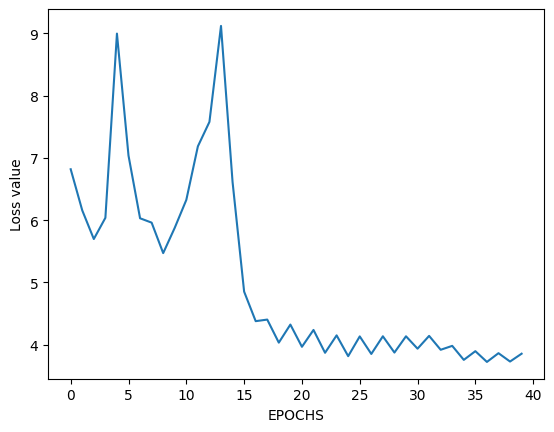

In [47]:
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

## Accuracy

In [48]:
_, _, _, y_test_hat = forward_prop(w1, w2, b1, b2, X_test)
y_test_hat_true = np.argmax(y_test_hat, axis=1)
accuracy = accuracy_score(y_test_true, y_test_hat_true)
print(f'loss: {loss:.2f}, acc: {accuracy:.2f}')

loss: 3.86, acc: 0.90
